# What *drugs/compounds* target gene products of gene "coagulation factor II, thrombin"?

In [83]:
# TO REMOVE
!pip install SPARQLWrapper pandas --quiet
from SPARQLWrapper import SPARQLWrapper, JSON, XML, CSV, TSV
import pandas as pd, io
from pandas.io.json import json_normalize
from IPython.core.display import display, HTML
%matplotlib inline

The NCATS Translator [Red team knowledge graph](http://graphdb.dumontierlab.com/repositories/ncats-red-kg) is used to answer the question. It integrates the following datasets:
* HGNC: genes
* DrugBank: drugs, drug-protein and drug-drug interactions
* PrePPI: protein-protein interactions
* BioGRID: protein-protein interactions with evidences
* WikiPathways: pathways, gene-gene interactions
* DATE: link drugs to pathways
* GOTE: link proteins to pathways

The SPARQL queries used to transform the datasets to the [BioLink model](https://biolink.github.io/biolink-model/docs/) can be found [here](https://github.com/vemonet/data2services-insert/tree/master/insert-biolink).

In [85]:
sparql = SPARQLWrapper("http://graphdb.dumontierlab.com/repositories/ncats-red-kg")
sparql.setQuery("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bl: <http://w3id.org/biolink/vocab/>
SELECT distinct ?gene ?produceProtein ?affectedByDrug ?byRelation ?inInteraction ?inGraph
{
  ?geneUri a bl:Gene ;
    bl:id ?geneId ; 
    bl:name ?gene ;
    bl:has_gene_product ?geneProductUri .
  OPTIONAL{ ?geneProductUri bl:name ?produceProtein . }
  ?geneProductUri a bl:GeneProduct .
  GRAPH ?inGraph {
      ?inInteraction ?associationSubject ?geneProductUri ;
       ?associationObject ?drugUri ;
       bl:relation ?byRelation .
   }
  ?drugUri a bl:ChemicalSubstance .
  OPTIONAL {?drugUri bl:name ?affectedByDrug .}
  FILTER regex(str(?gene), "%s") .
} limit 100
""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

table = json_normalize(results["results"]["bindings"])

#df = pd.read_csv(io.BytesIO(results))

In [82]:
table.head()

,affectedByDrug.type,affectedByDrug.value,byRelation.type,byRelation.value,gene.type,gene.value,inGraph.type,inGraph.value,inInteraction.type,inInteraction.value
0,literal,compendium,uri,http://w3id.org/biolink/vocab/interacts_with,literal,gamma-aminobutyric acid type A receptor beta2 ...,uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...
1,literal,ethchlorvynol,uri,http://w3id.org/biolink/vocab/interacts_with,literal,gamma-aminobutyric acid type A receptor beta2 ...,uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...
2,literal,estazolam,uri,http://w3id.org/biolink/vocab/interacts_with,literal,gamma-aminobutyric acid type A receptor beta2 ...,uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...
3,literal,diazepam,uri,http://w3id.org/biolink/vocab/interacts_with,literal,gamma-aminobutyric acid type A receptor beta2 ...,uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...
4,literal,alprazolam,uri,http://w3id.org/biolink/vocab/interacts_with,literal,gamma-aminobutyric acid type A receptor beta2 ...,uri,https://w3id.org/data2services/graph/biolink/date,uri,https://w3id.org/data2services/data/protein/in...


In [86]:
table.columns

Index(['affectedByDrug.type', 'affectedByDrug.value', 'byRelation.type',
       'byRelation.value', 'gene.type', 'gene.value', 'inGraph.type',
       'inGraph.value', 'inInteraction.type', 'inInteraction.value'],
      dtype='object')

In [74]:
table.groupby('affectedByDrug.value').agg('count')#['affectedByDrug.type']

,affectedByDrug.type,byRelation.type,byRelation.value,gene.type,gene.value,inGraph.type,inGraph.value,inInteraction.type,inInteraction.value
affectedByDrug.value,,,,,,,,,
adinazolam,7,7,7,7,7,7,7,7,7
alprazolam,7,7,7,7,7,7,7,7,7
chlordiazepoxide,7,7,7,7,7,7,7,7,7
cinolazepam,4,4,4,4,4,4,4,4,4
clonazepam,7,7,7,7,7,7,7,7,7
clorazepate,3,3,3,3,3,3,3,3,3
compendium,7,7,7,7,7,7,7,7,7
diazepam,7,7,7,7,7,7,7,7,7
estazolam,1,1,1,1,1,1,1,1,1


In [75]:
affectedbydrug = table.groupby('affectedByDrug.value').count()['affectedByDrug.type'].reset_index()#.plot()

In [76]:
import matplotlib.pyplot as plt

In [77]:
affectedbydrug

,affectedByDrug.value,affectedByDrug.type
0,adinazolam,7
1,alprazolam,7
2,chlordiazepoxide,7
3,cinolazepam,4
4,clonazepam,7
5,clorazepate,3
6,compendium,7
7,diazepam,7
8,estazolam,1
9,ethchlorvynol,3


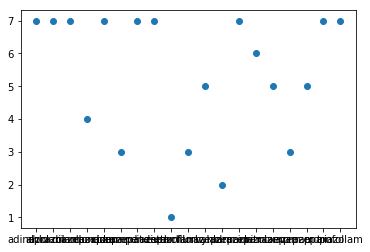

In [78]:
plt.scatter(affectedbydrug['affectedByDrug.value'], affectedbydrug['affectedByDrug.type'])